## Import Data

In [ ]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, encoding='utf-8'):
    # Construct the download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Set the output file name
    output = f'downloaded_file.{file_type}'

    # Download the file
    gdown.download(download_url, output, quiet=False)

    # Read the file based on its extension
    if file_type == 'csv' or file_type == 'gz':
        data = pd.read_csv(output, encoding=encoding)
    elif file_type == 'xlsx':
        data = pd.read_excel(output)
    else:
        raise ValueError("Unsupported file type. Please use 'csv', 'gz', or 'xlsx'.")

    return data


In [ ]:
pd.set_option('display.max_columns', None)

In [1]:
# # train dataset
file_id = '***'
file_type = 'gz'
train = load_from_drive(file_id, file_type)

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [2]:
# test dataset
file_id = '***'
file_type = 'gz'
test = load_from_drive(file_id, file_type)

In [ ]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


## Data Overview

In [ ]:
import pandas as pd

def data_overview(df, name="DataFrame"):
    """
    Data Overview Function:
    - Displays number of rows and columns
    - Prints DataFrame info
    - Shows missing value counts
    - Shows duplicate row count
    - Shows count of unique values per column
    - Shows descriptive statistics for numerical features

    Parameters:
    - df (DataFrame): The dataset to inspect
    - name (str): Name of the dataset (default is "DataFrame")

    Returns:
    - None (prints information directly)
    """
    print(f"\nDataFrame: {name}\n")

    # DataFrame Shape
    print(f"{df.shape[0]} rows, {df.shape[1]} columns\n")

    # DataFrame Info
    print("DataFrame Info:")
    print(df.info())

    # Missing Value Count
    missing_values = df.isna().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # Duplicate Row Count
    duplicate_count = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicate_count}")

    # Unique Value Count
    unique_counts = df.nunique()
    print("\nUnique Values per Column:")
    print(unique_counts)

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())


In [ ]:
# define target，categorical，numerical variable
target = ['target']
cat = [col for col in train.columns if ('cat' in col) or ('bin' in col) and (col != 'id')]
num = [col for col in train.columns if (col not in cat) and (col not in target) and (col != 'id')]

In [ ]:
# If the minimum value is -1, it indicates missing values in those columns
print(train.describe().T[train.describe().T['min']==-1])
print('\n')
print(test.describe().T[test.describe().T['min']==-1])

                  count      mean       std  min       25%       50%  \
ps_ind_02_cat  595212.0  1.358943  0.664594 -1.0  1.000000  1.000000   
ps_ind_04_cat  595212.0  0.416794  0.493311 -1.0  0.000000  0.000000   
ps_ind_05_cat  595212.0  0.405188  1.350642 -1.0  0.000000  0.000000   
ps_reg_03      595212.0  0.551102  0.793506 -1.0  0.525000  0.720677   
ps_car_01_cat  595212.0  8.295933  2.508270 -1.0  7.000000  7.000000   
ps_car_02_cat  595212.0  0.829931  0.375716 -1.0  1.000000  1.000000   
ps_car_03_cat  595212.0 -0.504899  0.788654 -1.0 -1.000000 -1.000000   
ps_car_05_cat  595212.0 -0.157732  0.844417 -1.0 -1.000000  0.000000   
ps_car_07_cat  595212.0  0.910027  0.347106 -1.0  1.000000  1.000000   
ps_car_09_cat  595212.0  1.328890  0.978747 -1.0  0.000000  2.000000   
ps_car_11      595212.0  2.346072  0.832548 -1.0  2.000000  3.000000   
ps_car_12      595212.0  0.379945  0.058327 -1.0  0.316228  0.374166   
ps_car_14      595212.0  0.276256  0.357154 -1.0  0.333167  0.36

## Data Clean

### Tackle target variable imbalance of train dataset

Non-Claim Count: 573518
Claim Count: 21694
Proportion: 26.44 : 1


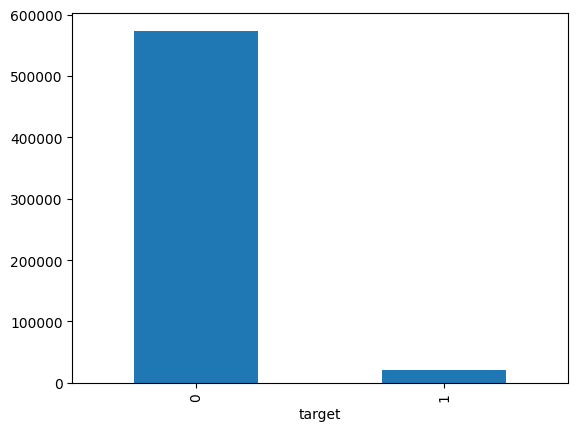

In [ ]:
# Check for data imbalance in the target variable

import numpy as np
import pandas as pd

target_count = train.target.value_counts()
print('Non-Claim Count:', target_count[0])
print('Claim Count:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Plot the class distribution
target_count.plot(kind='bar');

$$
undersampling~rate = \frac{(1-r)*{minority~size}}{r*majority~size}\\
where ~r = desired~proportion~rate
$$

In [ ]:
# !pip install imblearn

from imblearn.over_sampling import BorderlineSMOTE
import numpy as np
import pandas as pd

def undersampling_borderlinesmote(df, desired_prop_rate=0.15, smote_ratio=0.5):
    """
    Perform undersampling on the majority class and Borderline-SMOTE oversampling on the minority class.

    Parameters:
    - df (DataFrame): Dataset with a 'target' column (binary classification).
    - desired_prop_rate (float): Desired proportion of minority class after undersampling.
    - smote_ratio (float): Desired ratio of minority to majority class after SMOTE.

    Returns:
    - resampled_df (DataFrame): The DataFrame after undersampling and SMOTE oversampling.
    """
    # Get indices for each class
    idx_class_0 = df[df['target'] == 0].index
    idx_class_1 = df[df['target'] == 1].index

    # Count samples per class
    count_class_0 = len(idx_class_0)
    count_class_1 = len(idx_class_1)

    # Calculate undersampling rate
    undersampling_rate = ((1 - desired_prop_rate) * count_class_1) / (count_class_0 * desired_prop_rate)
    undersampled_majority_size = int(undersampling_rate * count_class_0)
    print(f"Undersampling ratio for class 0 (majority): {undersampling_rate:.4f}")
    print(f"Size of class 0 after undersampling: {undersampled_majority_size}")

    # Randomly sample from majority class (class 0)
    np.random.seed(100)
    undersampled_idx = np.random.choice(idx_class_0, size=undersampled_majority_size, replace=False)

    # Combine undersampled majority class with all minority class samples
    idx_total = np.concatenate([undersampled_idx, idx_class_1])
    df = df.loc[idx_total].reset_index(drop=True)

    # Apply Borderline-SMOTE oversampling
    X = df.drop('target', axis=1)
    y = df['target']
    smote = BorderlineSMOTE(random_state=42, k_neighbors=5, sampling_strategy=smote_ratio)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Reconstruct DataFrame
    resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='target')], axis=1)

    # Show class distribution after resampling
    post_count_class_0 = (resampled_df['target'] == 0).sum()
    post_count_class_1 = (resampled_df['target'] == 1).sum()
    print(f"Post-resampling class 0 (negative) count: {post_count_class_0}")
    print(f"Post-resampling class 1 (positive) count: {post_count_class_1}")
    print(f"Class ratio after resampling: {post_count_class_0 / post_count_class_1:.2f} : 1")

    return resampled_df


In [ ]:
train_balanced = undersampling_borderlinesmote(df = train)

Undersampling ratio for class 0 (majority): 0.2143
Size of class 0 after undersampling: 122932
Post-resampling class 0 (negative) count: 122932
Post-resampling class 1 (positive) count: 61466
Class ratio after resampling: 2.00 : 1


### Handling Missing Value

In [ ]:
import pandas as pd

def get_missing_summary(df, missing_value=-1):

    # Count missing values
    missing_cnts = (df == missing_value).sum()

    # Calculate missing value percentage
    missing_pct = missing_cnts / len(df) * 100

    # Create summary DataFrame
    missing_summary = pd.DataFrame({
        'missing_cnts': missing_cnts,
        'missing_pct%': missing_pct
    })

    # Keep only columns with missing values
    missing_summary = missing_summary[missing_summary['missing_cnts'] > 0]

    # Sort by count of missing values in descending order
    missing_summary = missing_summary.sort_values(by='missing_cnts', ascending=False)

    return missing_summary


In [ ]:
missing_summary_train = get_missing_summary(train_balanced)
missing_summary_train

,missing_cnts,missing_pct%
ps_car_03_cat,113753,61.688847
ps_car_05_cat,69884,37.898459
ps_reg_03,26039,14.121086
ps_car_14,10837,5.876962
ps_car_07_cat,3209,1.740257
ps_ind_05_cat,1626,0.881788
ps_car_09_cat,165,0.089480
ps_ind_02_cat,80,0.043384
ps_car_01_cat,53,0.028742
ps_ind_04_cat,48,0.026031


In [ ]:
missing_summary_test = get_missing_summary(test)
missing_summary_test

,missing_cnts,missing_pct%
ps_car_03_cat,616911,69.097216
ps_car_05_cat,400359,44.842274
ps_reg_03,161684,18.109442
ps_car_14,63805,7.146489
ps_car_07_cat,17331,1.941161
ps_ind_05_cat,8710,0.975565
ps_car_09_cat,877,0.098229
ps_ind_02_cat,307,0.034386
ps_car_01_cat,160,0.017921
ps_ind_04_cat,145,0.016241


In [ ]:
missing_train_cols = missing_summary_train.index.tolist()
missing_train_cols

['ps_car_03_cat',
 'ps_car_05_cat',
 'ps_reg_03',
 'ps_car_14',
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_11']

In [ ]:
missing_test_cols = missing_summary_test.index.tolist()
missing_test_cols

['ps_car_03_cat',
 'ps_car_05_cat',
 'ps_reg_03',
 'ps_car_14',
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11']

-  The top two columns have over 35% missing values, so we'll drop them first.


In [ ]:
cols_to_drop=['ps_car_03_cat','ps_car_05_cat']

In [ ]:
cat = [col for col in cat if col not in cols_to_drop]

In [ ]:
# make a copy
train_balanced_copy = train_balanced.copy()
test_copy = test.copy()

In [ ]:
train_balanced_copy.drop(cols_to_drop,axis=1,inplace=True)
test_copy.drop(cols_to_drop,axis=1,inplace=True)

For numerical variables:
- 'ps_reg_03' and 'ps_car_14' have relatively high amounts of missing data,
- 'ps_car_11' has very few missing values.

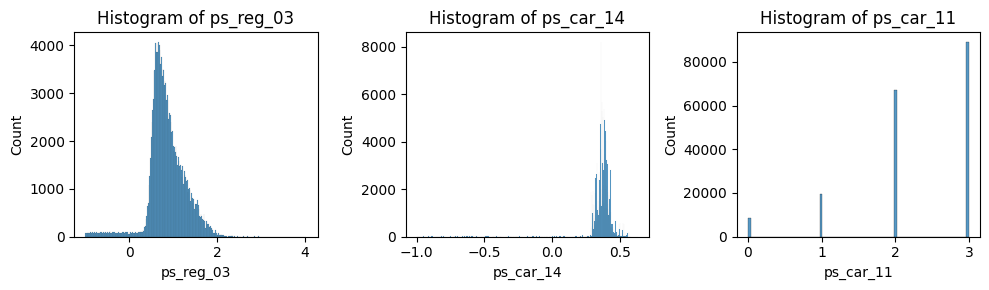

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np

# Set number of columns and rows for subplots
num_cols = 3
num_rows = 1
plt.figure(figsize=(10, 3))

# Plot histograms for selected continuous features
for i, column in enumerate(['ps_reg_03', 'ps_car_14', 'ps_car_11']):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(x=column, data=train_balanced_copy.replace(-1, np.nan))
    plt.title(f'Histogram of {column}')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


Since data is skewed, use medium to impute 'ps_reg_03', 'ps_car_14', 'ps_car_11'

In [ ]:
from sklearn.impute import SimpleImputer

# Columns with missing numerical values to be imputed
missing_num_cols = ['ps_reg_03', 'ps_car_14', 'ps_car_11']

# Fit the imputer on the training data using the median strategy, and fill in the training set
median_imputer = SimpleImputer(missing_values=-1, strategy='median')
train_balanced_copy[missing_num_cols] = median_imputer.fit_transform(train_balanced_copy[missing_num_cols])

# Use the same medians (from training data) to impute missing values in the test set
test_copy[missing_num_cols] = median_imputer.transform(test_copy[missing_num_cols])


For categorical variable

In [ ]:
missing_cat_cols = ['ps_car_07_cat','ps_ind_05_cat','ps_car_09_cat','ps_ind_02_cat','ps_car_01_cat','ps_ind_04_cat']

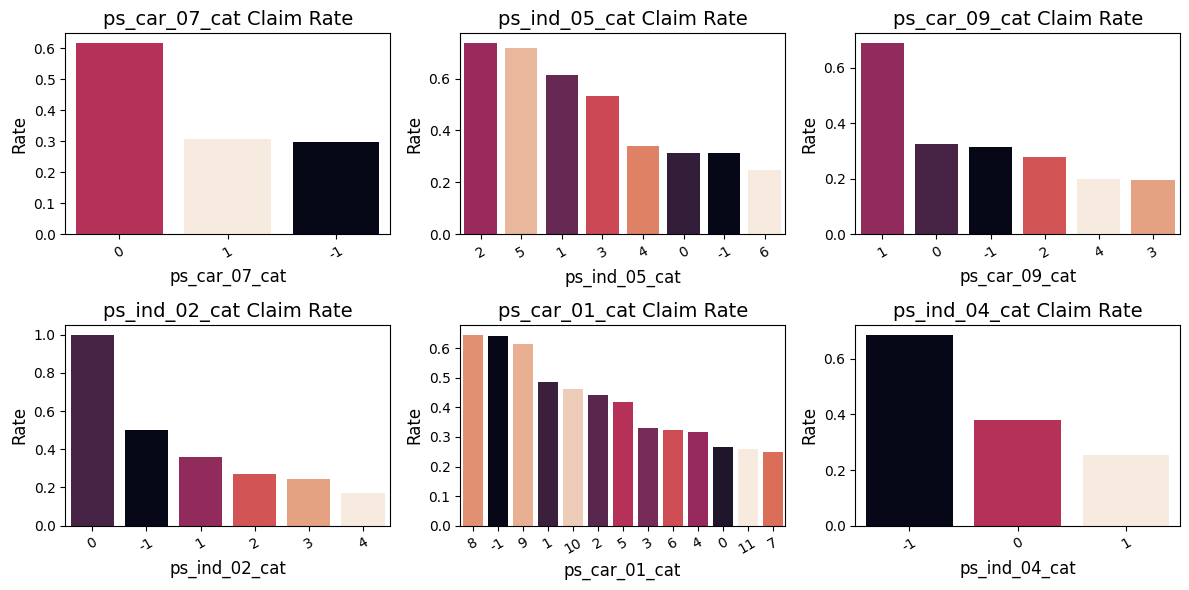

In [ ]:
# Set figure size and layout
num_cols = 3
num_rows = math.ceil(len(missing_cat_cols) / num_cols)
plt.figure(figsize=(12, 6))

# Plot bar charts showing claim rate by category for each missing categorical column
for i, col in enumerate(missing_cat_cols):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_balanced_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot sorted by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )
    plt.title(f'{col} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Since the -1 category shows a relatively high claim rate in each variable, we’ll keep -1 as a separate category rather than treating it as missing.

For the column 'ps_car_02_cat', which has missing values in test sets, we'll impute using the mode from the train set.

In [ ]:
# Calculate the mode of 'ps_car_02_cat' in the training set
ps_car_02_cat_mode = train_balanced_copy['ps_car_02_cat'].mode()[0]

# Fill missing values in the test set using the mode from the training set
test_copy['ps_car_02_cat'] = test_copy['ps_car_02_cat'].replace(-1, ps_car_02_cat_mode)

### Outlier Detection & Handling

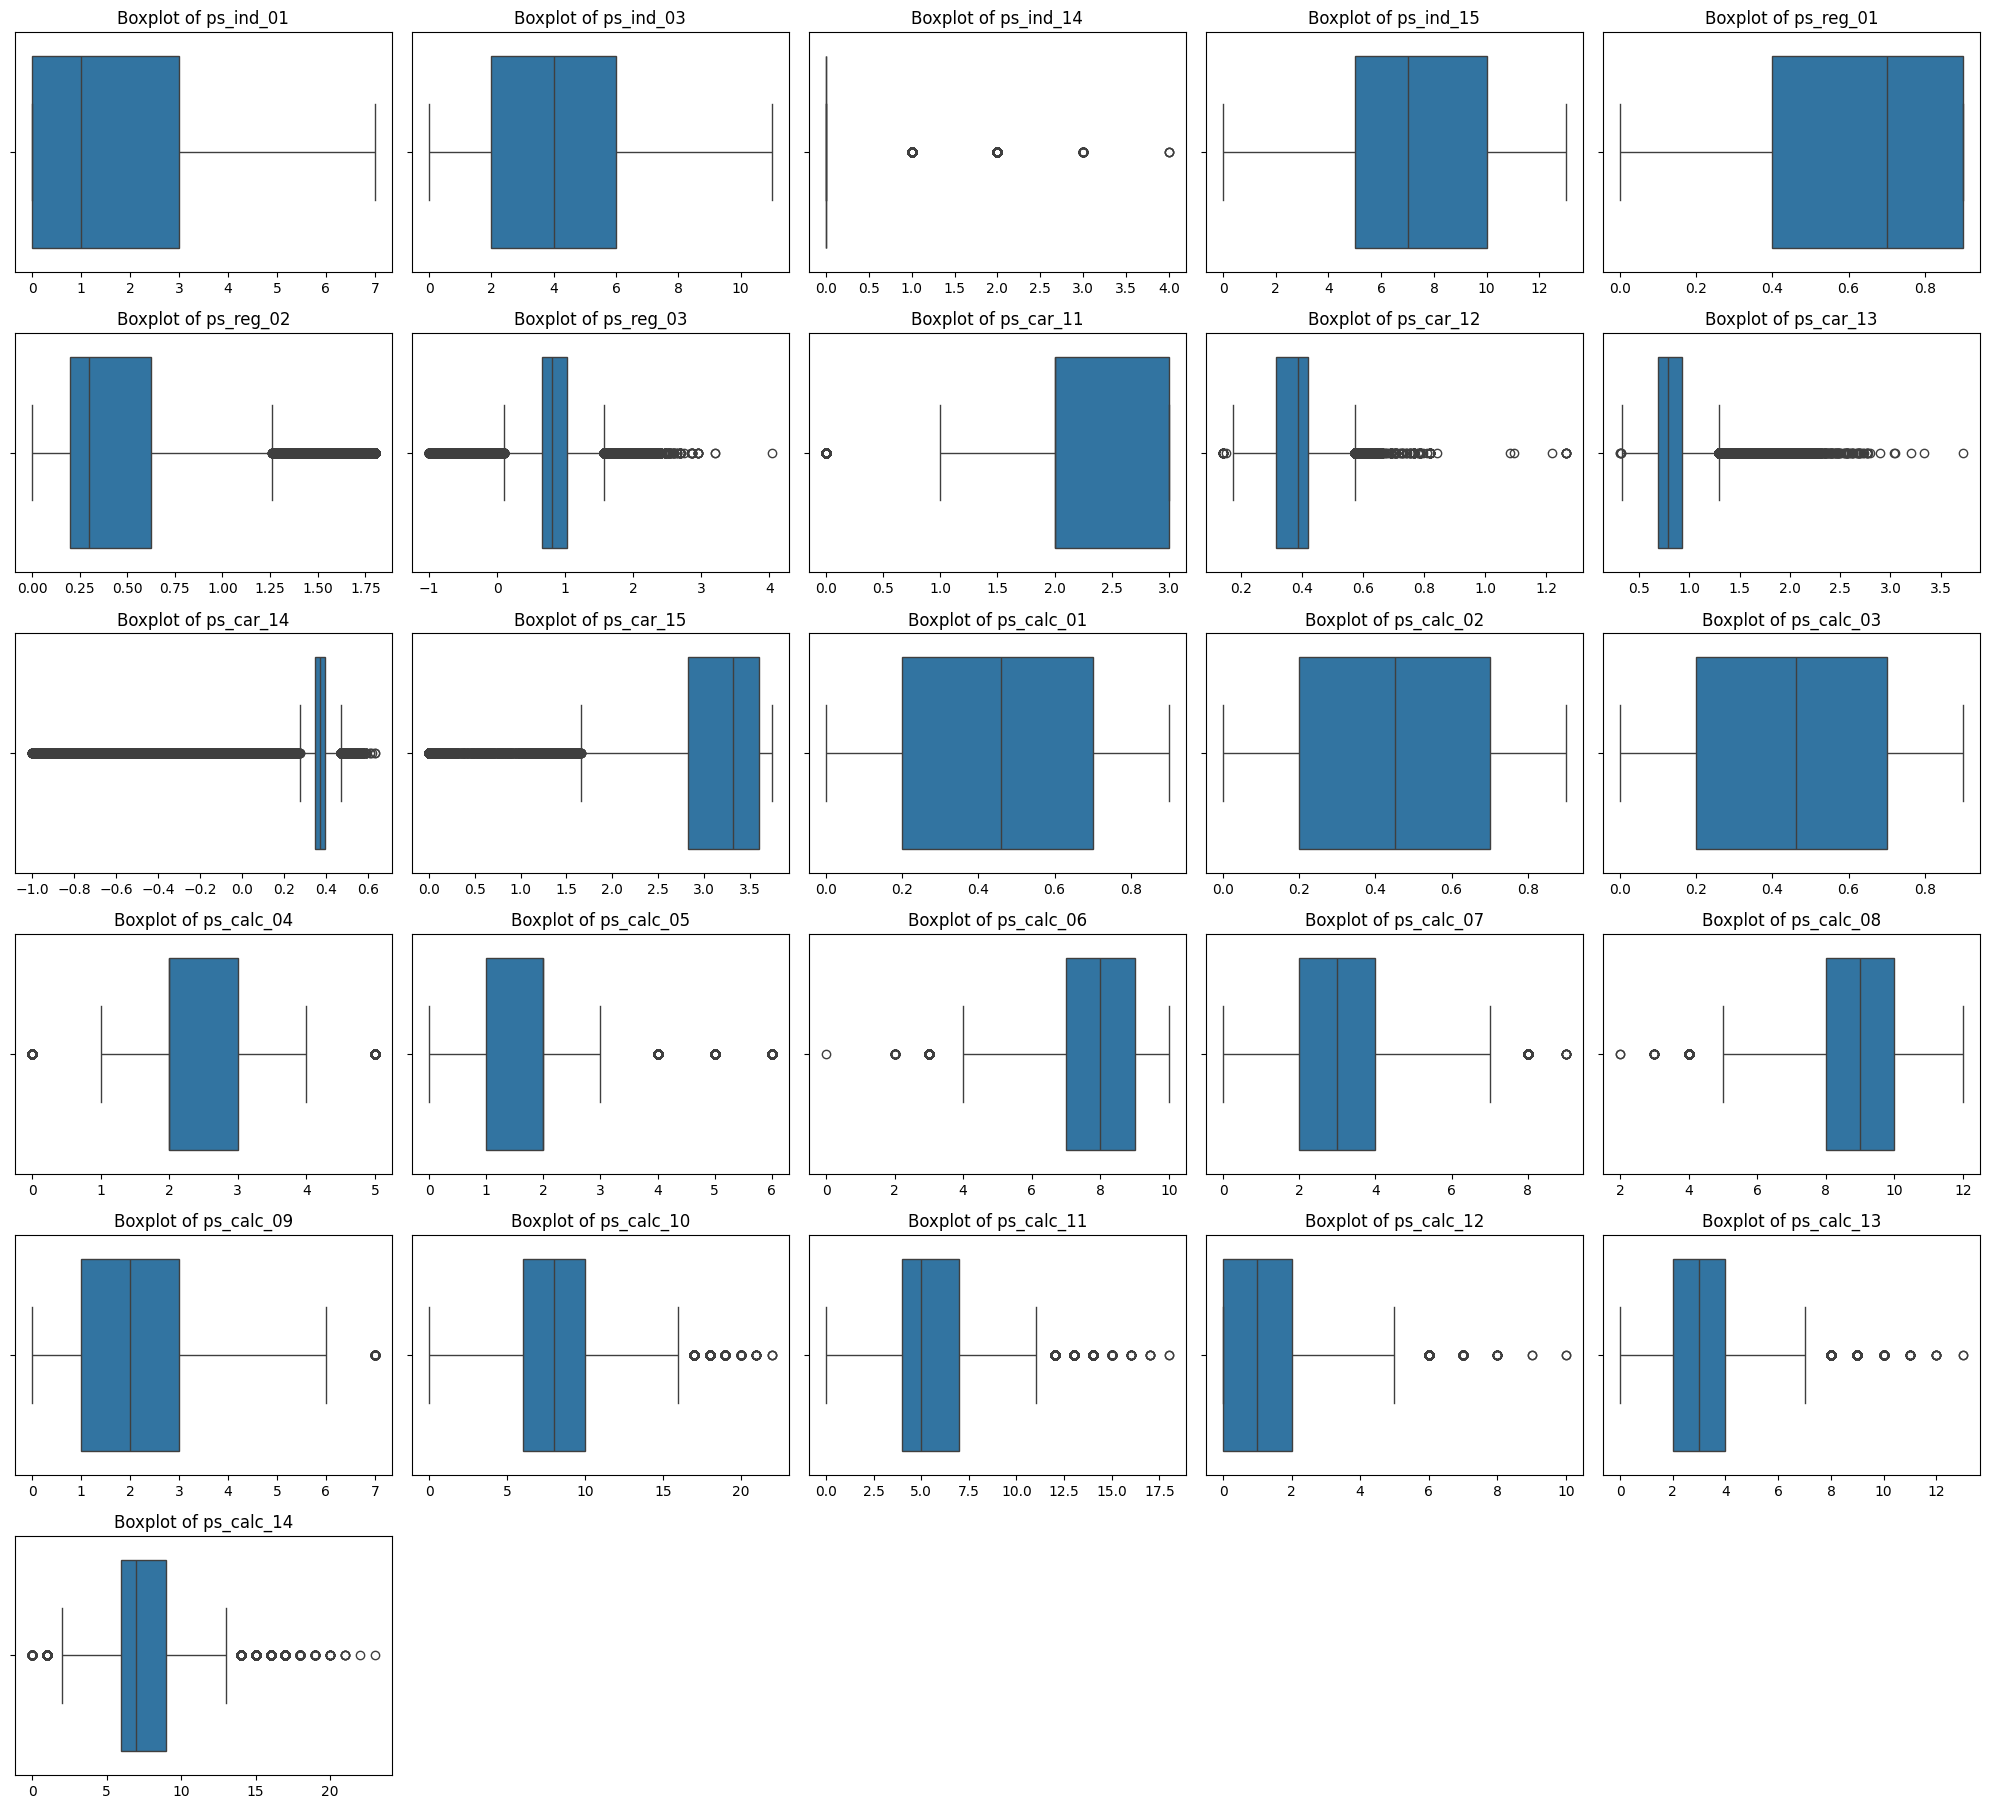

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set number of columns and rows for the subplot layout
num_cols = 5
num_rows = math.ceil(len(train_balanced_copy.columns) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Plot boxplots for all numerical columns
for i, column in enumerate(num):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=column, data=train_balanced_copy)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.xlabel('')  # Optional: hide x-axis label for cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
import pandas as pd

def get_outlier_summary(df, num):

    outlier_summary = []

    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Count and percentage
        outlier_cnt = len(outliers)
        outlier_ratio = outlier_cnt / len(df) * 100

        outlier_summary.append({
            'feature': col,
            'outlier_cnts': outlier_cnt,
            'outlier_ratio%': round(outlier_ratio, 2)
        })

    # Convert to DataFrame, sort by outlier count, and filter only features with outliers
    summary_df = pd.DataFrame(outlier_summary).sort_values(by='outlier_cnts', ascending=False).set_index('feature')
    summary_df = summary_df[summary_df['outlier_cnts'] > 0]

    return summary_df


In [ ]:
get_outlier_summary(train_balanced_copy, num)

,outlier_cnts,outlier_ratio%
feature,,
ps_reg_03,13247,7.18
ps_calc_05,12507,6.78
ps_reg_02,11201,6.07
ps_car_14,11159,6.05
ps_calc_04,10828,5.87
ps_car_11,8526,4.62
ps_car_13,8199,4.45
ps_car_15,7436,4.03
ps_calc_14,4160,2.26


In [ ]:
def replace_outliers_with_median(df, num):
    df_copy = df.copy()

    for col in num:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_val = df_copy[col].median()

        # Using median to replace outliers
        df_copy[col] = df_copy[col].apply(
            lambda x: median_val if x < lower_bound or x > upper_bound else x
        )

    return df_copy


In [ ]:
train_balanced_copy = replace_outliers_with_median(train_balanced_copy, num)

## EDA

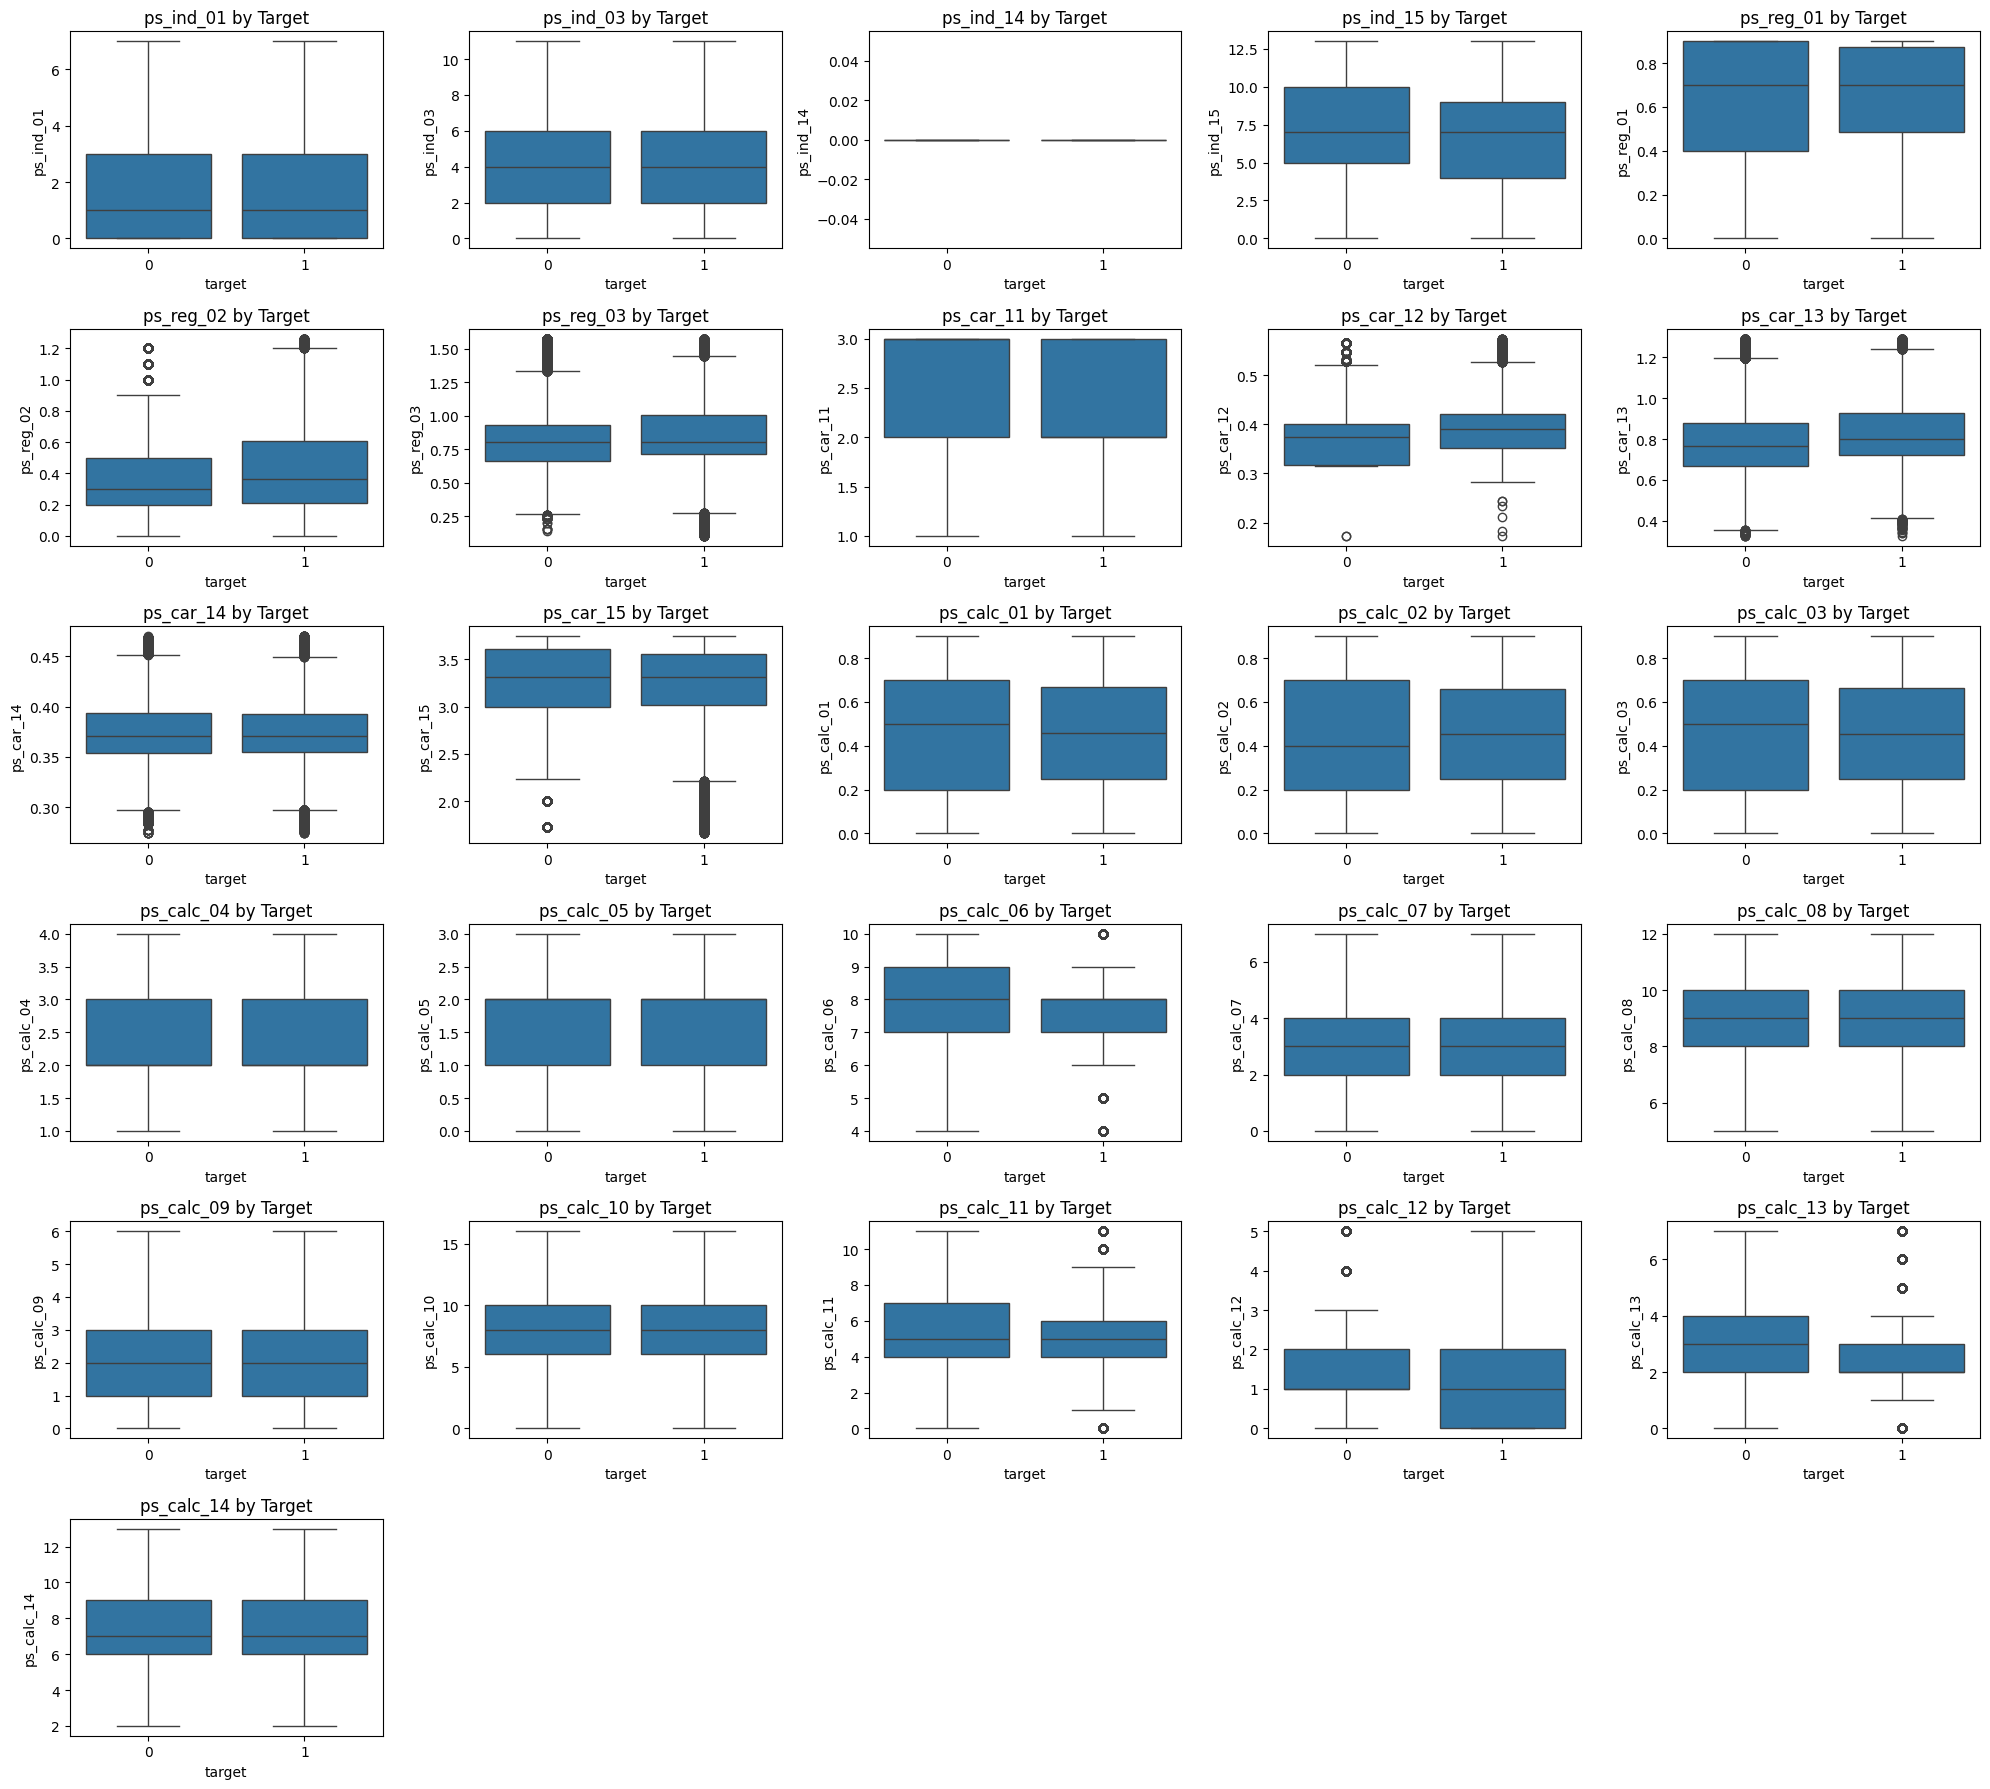

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 5
num_rows = math.ceil(len(num) / num_cols)

# Define overall figure size
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Create boxplots of each numerical feature grouped by the target variable
for i, column in enumerate(num):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='target', y=column, data=train_balanced_copy)
    plt.title(f'{column} by Target')

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

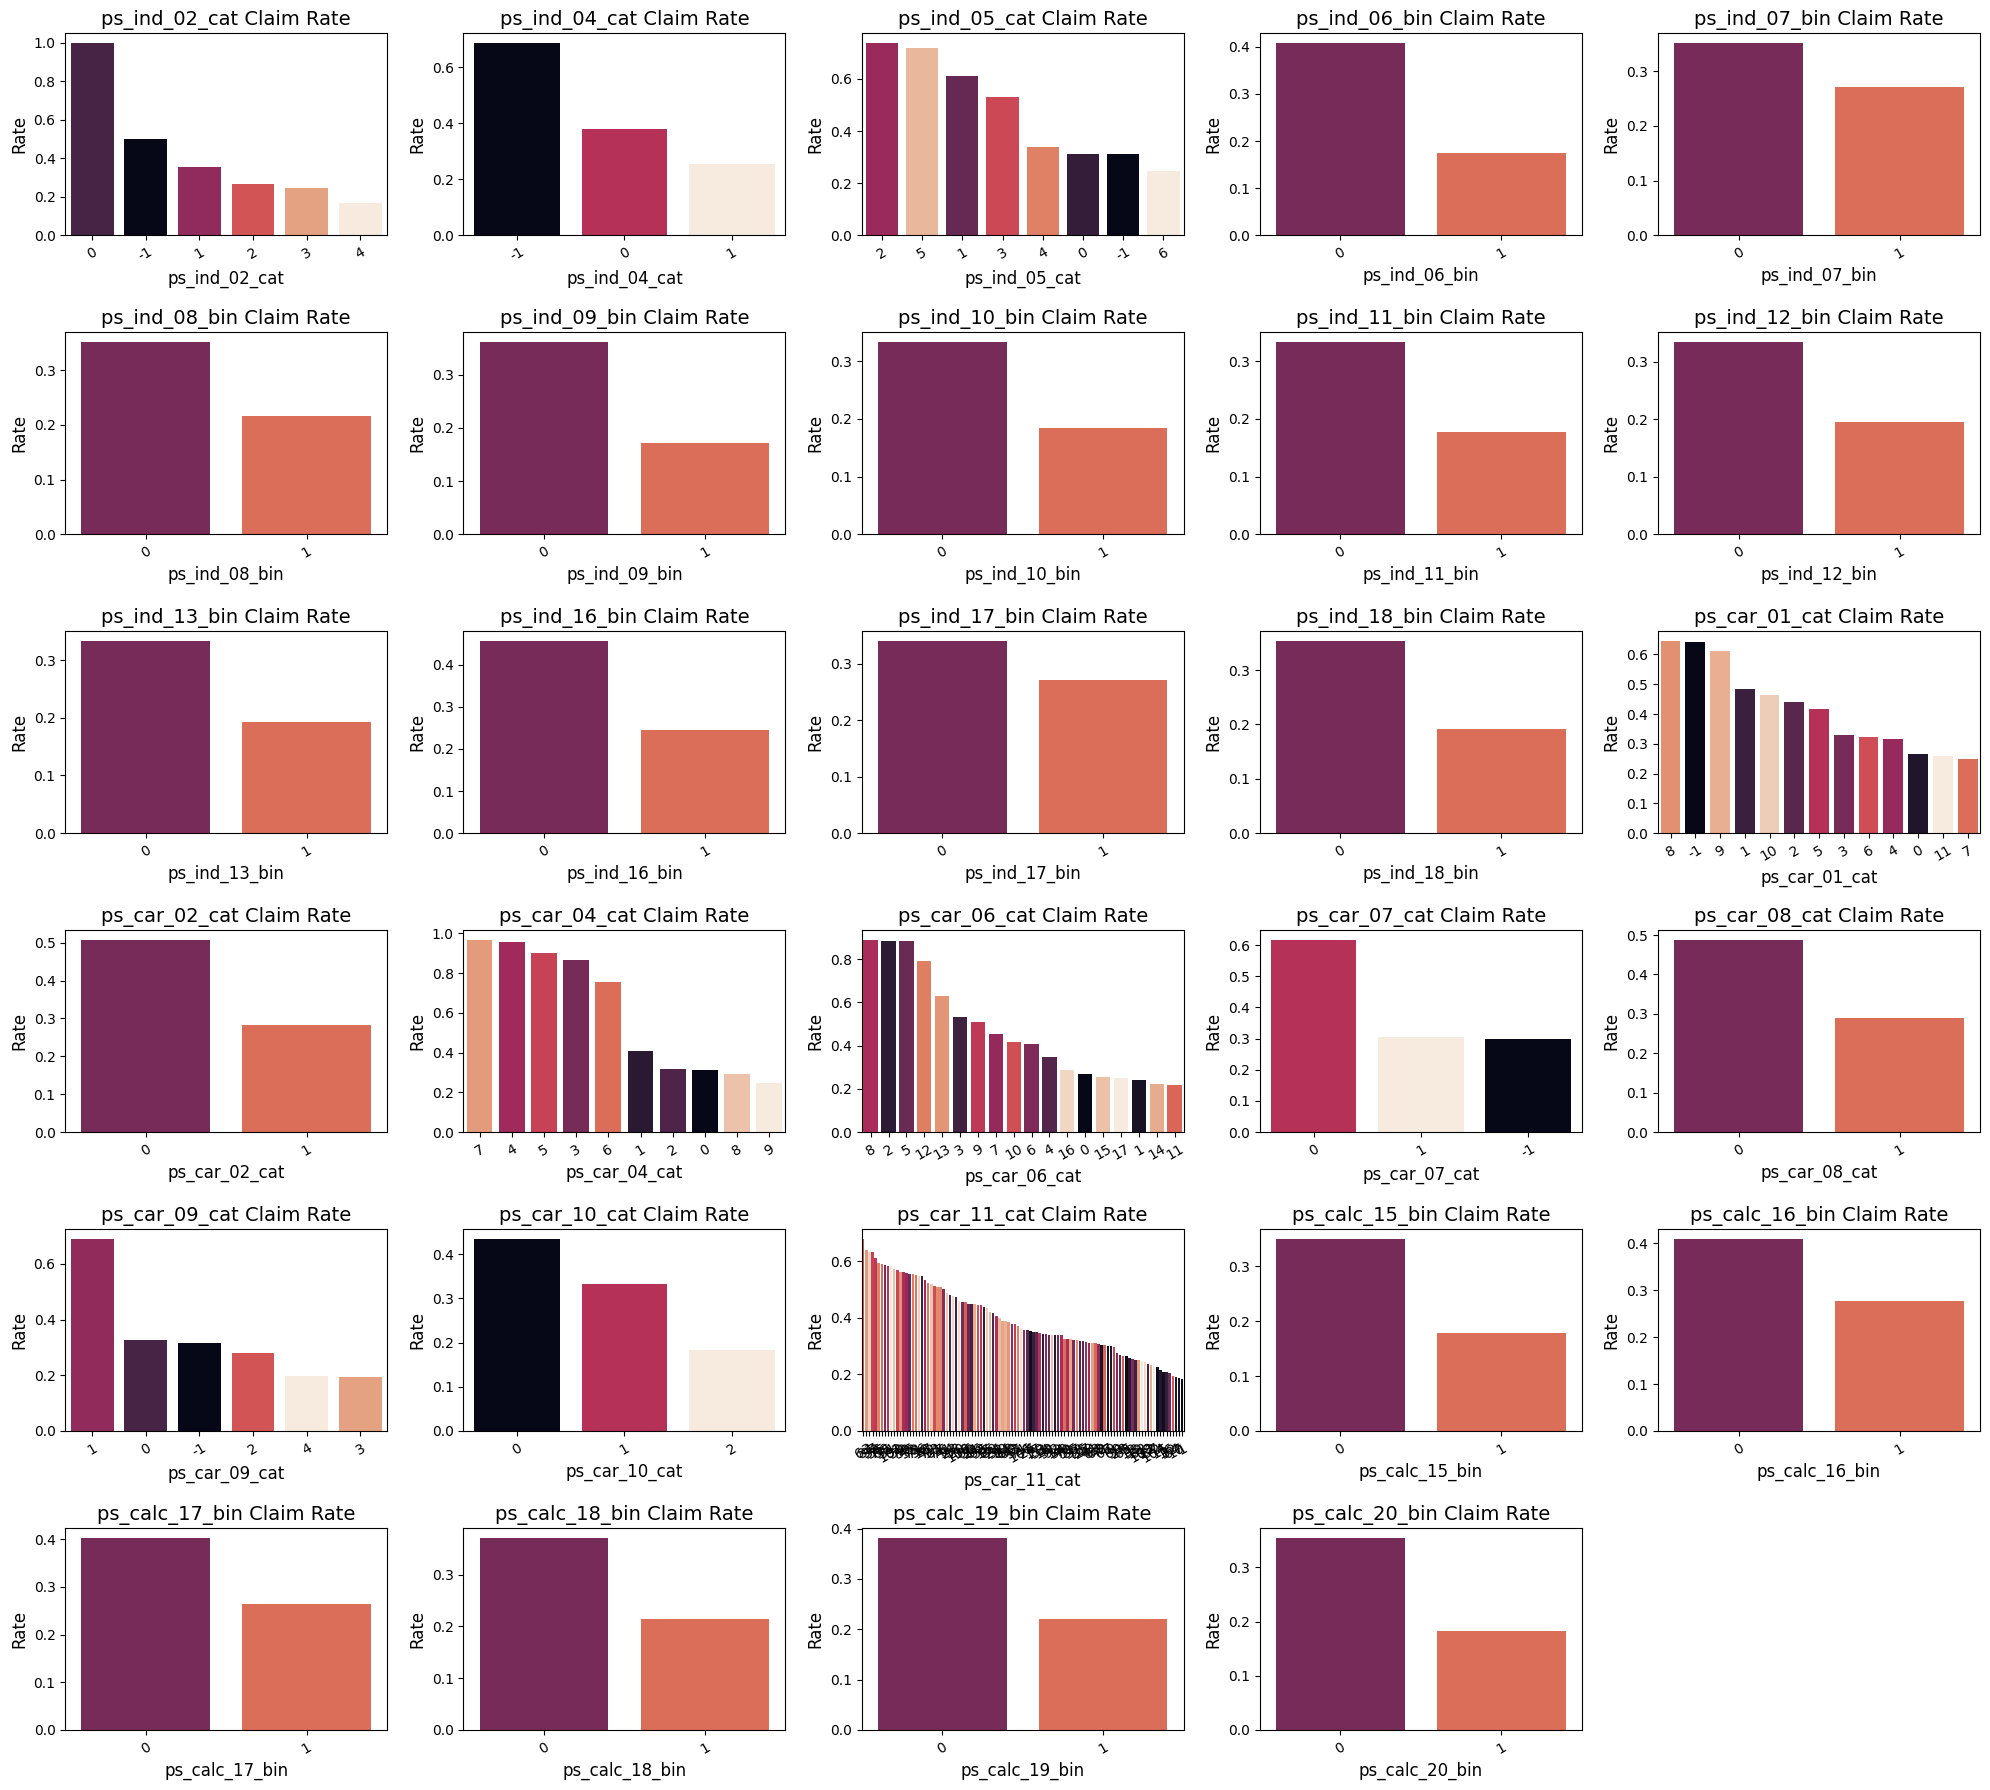

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 5
num_rows = math.ceil(len(cat) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Plot bar charts showing claim rate per category for each categorical feature
for i, col in enumerate(cat):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_balanced_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot with category ordering by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )

    # Set plot titles and labels
    plt.title(f'{col} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Feature Engineering

### Encoding

The categorical variable 'ps_car_11_cat' has over 100 unique categories. Using one-hot encoding would lead to a dimensionality explosion. Therefore, we start with reasonable target encoding parameters for baseline modeling, then optimize encoding and XGBoost parameters in the final tuning stage.

In [ ]:
import pandas as pd
import numpy as np

# Add random noise to prevent overfitting and target leakage
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

# Target Encoding with smoothing and optional noise
def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=100,
                  smoothing=10,
                  noise_level=0):
    """
    Performs target encoding on a categorical feature with smoothing and optional noise.

    Parameters:
    - trn_series (pd.Series): Categorical feature from the training set
    - tst_series (pd.Series): Categorical feature from the test set
    - target (pd.Series): Target values for training data
    - min_samples_leaf (int): Minimum samples to consider a category's mean reliable
    - smoothing (int or float): Smoothing effect to balance category mean vs. overall mean
    - noise_level (float): Random noise level to add to encoded values

    Returns:
    - Encoded training and test series (with noise added if specified)
    """

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name

    temp = pd.concat([trn_series, target], axis=1)

    # Compute target mean and count for each category
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing weights using a sigmoid function
    smoothing_weights = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Global target mean
    prior = target.mean()

    # Compute smoothed averages
    averages[target.name] = prior * (1 - smoothing_weights) + averages["mean"] * smoothing_weights
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # Merge with training data
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index

    # Merge with test data
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index

    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)


In [ ]:
train_encoded, test_encoded = target_encode(train_balanced_copy['ps_car_11_cat'],
                             test_copy['ps_car_11_cat'],
                             target=train_balanced_copy.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [ ]:
# Append the target-encoded version of 'ps_car_11_cat'
train_balanced_copy['ps_car_11_cat_enc'] = train_encoded
test_copy['ps_car_11_cat_enc'] = test_encoded

# Backup the original 'ps_car_11_cat' column
ps_car_11_cat_train = train_balanced_copy['ps_car_11_cat'].copy()
ps_car_11_cat_test = test_copy['ps_car_11_cat'].copy()

# Drop the original 'ps_car_11_cat' column from both datasets
train_balanced_copy.drop('ps_car_11_cat', axis=1, inplace=True)
test_copy.drop('ps_car_11_cat', axis=1, inplace=True)


In [ ]:
num = num + ['ps_car_11_cat_enc']
num

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_car_11_cat_enc']

In [ ]:
cat = [col for col in cat if col != 'ps_car_11_cat']
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Feature Interaction
To capture non-linear relationships and higher-order effects between numerical features, we generated interaction terms between selected continuous variables. These interactions can help the model learn combined effects that may not be evident when features are treated independently. Categorical features were excluded from interaction generation to avoid excessive dimensionality.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction-only polynomial features (no squared terms, no bias)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Generate interaction features from numerical columns
interactions = pd.DataFrame(
    data=poly.fit_transform(train_balanced_copy[num]),
    columns=poly.get_feature_names_out(num)
)

# Remove original numerical columns from the interactions DataFrame
interactions.drop(num, axis=1, inplace=True)

# Print number of features before adding interactions
print(f'Before feature interaction, training set has {train_balanced_copy.shape[1]} features')

# Concatenate interaction features to the original training DataFrame
train_balanced_copy = pd.concat([train_balanced_copy, interactions], axis=1)

# Print number of features after adding interactions
print(f'After feature interaction, training set has {train_balanced_copy.shape[1]} features')

Before feature interaction, training set has 57 features
After feature interaction, training set has 408 features


In [ ]:
# Generate interaction features for the test set using the same transformation
interactions_test = pd.DataFrame(
    data=poly.transform(test_copy[num]),
    columns=poly.get_feature_names_out(num)
)

# Concatenate interaction features to the original test DataFrame
test_copy = pd.concat([test_copy, interactions_test], axis=1)


### Feature Selection

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Set figure size for later plotting
plt.figure(figsize=[100, 20])

# Prepare features and target
X = train_balanced_copy.drop(['id', 'target'], axis=1)

# Convert categorical columns to 'category' dtype
X[cat] = X[cat].apply(lambda col: col.astype('category'))

y = train_balanced_copy['target']

# Use XGBoost's built-in support for categorical variables (requires xgboost v1.3+ and non-sklearn API)
model = XGBClassifier(enable_categorical=True)

# Train the model
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Figure size 10000x2000 with 0 Axes>

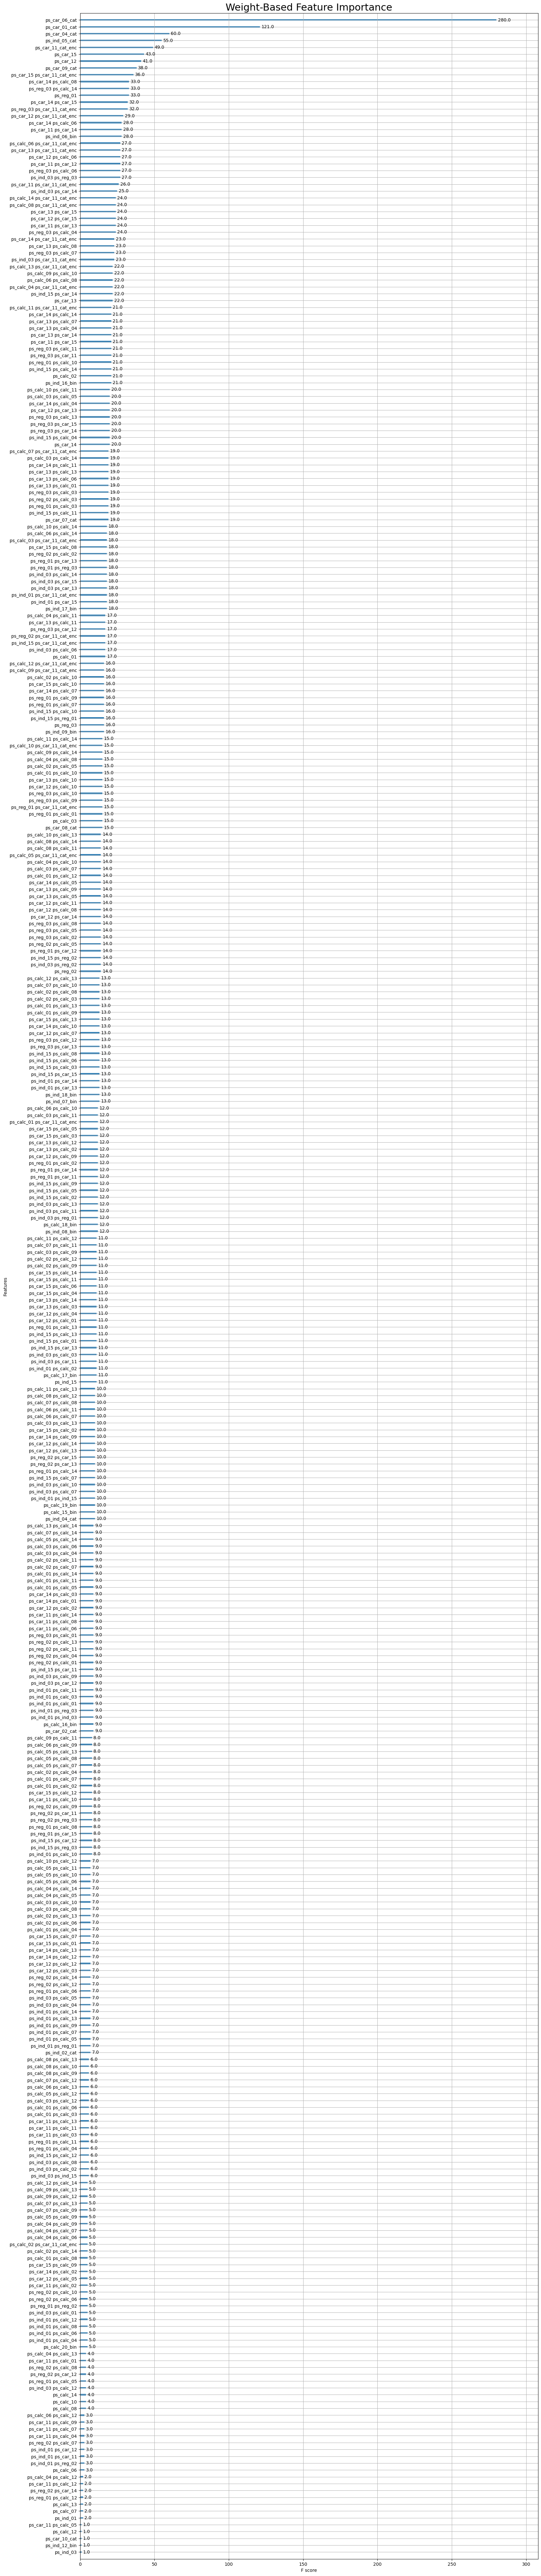

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Create a single subplot with a tall figure to accommodate many features
fig, ax = plt.subplots(figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

# Plot feature importance using 'weight' (number of times a feature is used to split)
plot_importance(ax=ax, booster=model, importance_type='weight')
ax.set_title('Weight-Based Feature Importance', fontsize=22)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Create a single tall subplot to display all features clearly
fig, ax = plt.subplots(figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

# Plot feature importance using 'gain' (average gain of splits involving the feature)
plot_importance(ax=ax, booster=model, importance_type='gain')
ax.set_title('Gain-Based Feature Importance', fontsize=22)

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Get feature importances based on 'weight'

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Dictionary to store selected features under each threshold
feat_dict = {}

# Loop over different importance thresholds
for thres in ['median', 'mean', '1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)

    print(f'Total features before selection: {X.shape[1]}')
    n_features = model_select.transform(X.values).shape[1]
    print(f'Total features after selection ({thres}): {n_features}')
    print('#' * 60)

    # Get selected feature names
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

Total features before selection: 406
Total features after selection (median): 203
############################################################
Total features before selection: 406
Total features after selection (mean): 40
############################################################
Total features before selection: 406
Total features after selection (1.25*mean): 39
############################################################


In [ ]:
feat_dict['mean']

['ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_12',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_car_11_cat_enc',
 'ps_reg_01 ps_car_11',
 'ps_reg_02 ps_calc_01',
 'ps_reg_02 ps_calc_02',
 'ps_reg_02 ps_car_11_cat_enc',
 'ps_car_11 ps_car_12',
 'ps_car_11 ps_car_14',
 'ps_car_11 ps_car_15',
 'ps_car_13 ps_car_15',
 'ps_car_13 ps_car_11_cat_enc',
 'ps_calc_02 ps_calc_03']

Get feature importances based on 'gain'

In [ ]:
# Get feature importances based on 'gain'
importances = model.get_booster().get_score(importance_type='gain')

# Ensure all features are represented (fill missing ones with 0 gain)
importances_dict = {col: importances.get(col, 0) for col in X.columns}
importances_df = pd.DataFrame(list(importances_dict.items()), columns=['Feature', 'Gain'])

# Define thresholds: median, mean, and 1.25 × mean
thresholds = {
    'median': np.median(importances_df['Gain']),
    'mean': np.mean(importances_df['Gain']),
    '1.25*mean': 1.25 * np.mean(importances_df['Gain'])
}

# Perform feature selection based on each threshold
feat_dict_2 = {}

for thres_key, thres_value in thresholds.items():
    print(f'Total features before selection: {X.shape[1]}')

    # Keep only features with gain greater than or equal to the threshold
    selected_vars = importances_df[importances_df['Gain'] >= thres_value]['Feature'].tolist()

    print(f'Total features after selection ({thres_key}): {len(selected_vars)}')
    print('#' * 60)

    feat_dict_2[thres_key] = selected_vars



Total features before selection: 406
Total features after selection (median): 203
############################################################
Total features before selection: 406
Total features after selection (mean): 40
############################################################
Total features before selection: 406
Total features after selection (1.25*mean): 39
############################################################


In [ ]:
feat_dict_2['mean']

['ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_12',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'ps_car_11_cat_enc',
 'ps_reg_01 ps_car_11',
 'ps_reg_02 ps_calc_01',
 'ps_reg_02 ps_calc_02',
 'ps_reg_02 ps_car_11_cat_enc',
 'ps_car_11 ps_car_12',
 'ps_car_11 ps_car_14',
 'ps_car_11 ps_car_15',
 'ps_car_13 ps_car_15',
 'ps_car_13 ps_car_11_cat_enc',
 'ps_calc_02 ps_calc_03']

In [ ]:
# The features selected using the two criteria ('gain' vs 'weight') under 'mean' threshold are the same
feat_dict_2['mean'] == feat_dict['mean']

True

In [ ]:
final_train = train_balanced_copy[feat_dict['mean']+['target']]

In [ ]:
final_test = test_copy[feat_dict['mean']]

In [ ]:
final_test = final_test.loc[:, ~final_test.columns.duplicated()]

In [ ]:
cat = [col for col in final_train.columns if (('cat' in col) or ('bin' in col)) and ('ps_car_11_cat_enc' not in col)]
cat

['ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

## Model Development & Tuning

### Joint Hyperparameter Tuning: Target Encoding + XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
final_train['ps_car_11_cat'] = ps_car_11_cat_train

In [ ]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# --- Target Encoding function with noise ---
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series, val_series, target, min_samples_leaf=100, smoothing=10, noise_level=0.01):
    col = trn_series.name
    temp = pd.concat([trn_series, target], axis=1)
    averages = temp.groupby(by=col)[target.name].agg(["mean", "count"])
    smoothing_val = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    prior = target.mean()
    averages["encoded"] = prior * (1 - smoothing_val) + averages["mean"] * smoothing_val
    averages.drop(["mean", "count"], axis=1, inplace=True)

    ft_trn = pd.merge(trn_series.to_frame(col), averages.reset_index(), on=col, how='left')['encoded'].fillna(prior)
    ft_val = pd.merge(val_series.to_frame(col), averages.reset_index(), on=col, how='left')['encoded'].fillna(prior)
    ft_trn.index = trn_series.index
    ft_val.index = val_series.index
    return add_noise(ft_trn, noise_level), add_noise(ft_val, noise_level)

# --- Cross-validated evaluation with dynamic feature interaction ---
def evaluate_with_dynamic_interactions(df, target_col, cat_col_to_encode, interaction_cols,
                                       interaction_name_prefix, xgb_params, encoding_params,
                                       early_stopping_rounds=50, n_splits=10, verbose=False):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        X_train[interaction_name_prefix], X_val[interaction_name_prefix] = target_encode(
            X_train[cat_col_to_encode], X_val[cat_col_to_encode], y_train, **encoding_params
        )

        # Drop original categorical column
        X_train.drop(columns=[cat_col_to_encode], inplace=True)
        X_val.drop(columns=[cat_col_to_encode], inplace=True)

        # Add interaction terms
        for base_col in interaction_cols:
            inter_col_name = f"{base_col}_{interaction_name_prefix}"

            if base_col not in X_train.columns:
                pass
            else:
                X_train[inter_col_name] = X_train[base_col] * X_train[interaction_name_prefix]
                X_val[inter_col_name] = X_val[base_col] * X_val[interaction_name_prefix]

        model = XGBClassifier(eval_metric='auc', use_label_encoder=False,
                              early_stopping_rounds=early_stopping_rounds, **xgb_params)

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=verbose)
        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)

    return np.mean(auc_scores)

# --- Joint Optuna objective ---
def joint_objective(trial):
    # Target encoding params
    encoding_params = {
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 500),
        'smoothing': trial.suggest_float('smoothing', 0.1, 50.0, log=True),
        'noise_level': trial.suggest_float('noise_level', 0.0, 0.05)
    }

    # XGBoost hyperparameters
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1.0, 2.0),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0)
    }

    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 30, 100)

    auc = evaluate_with_dynamic_interactions(
        df=final_train,
        target_col='target',
        cat_col_to_encode='ps_car_11_cat',
        interaction_cols=['ps_reg_02', 'ps_car_13'],
        interaction_name_prefix='ps_car_11_cat_enc',
        xgb_params=xgb_params,
        encoding_params=encoding_params,
        early_stopping_rounds=early_stopping_rounds,
        verbose=False
    )
    return auc

# --- Run the joint optimization ---
joint_study = optuna.create_study(direction='maximize', study_name='joint_xgb_encoding')
joint_study.optimize(joint_objective, n_trials=10)

# --- Output best result ---
print("Best joint parameters:", joint_study.best_params)
from optuna.visualization import plot_param_importances, plot_optimization_history
plot_optimization_history(joint_study).show()
plot_param_importances(joint_study).show()


[I 2025-05-18 06:50:29,123] A new study created in memory with name: joint_xgb_encoding
[I 2025-05-18 06:52:25,709] Trial 0 finished with value: 0.8643637901022092 and parameters: {'min_samples_leaf': 153, 'smoothing': 0.5055513820914359, 'noise_level': 0.03208583903821499, 'n_estimators': 187, 'max_depth': 6, 'learning_rate': 0.04013373677235633, 'subsample': 0.957129984677103, 'colsample_bytree': 0.9229184826635546, 'min_child_weight': 3, 'reg_alpha': 0.31104879852758194, 'reg_lambda': 1.0296357397793314, 'gamma': 0.05878950987240379, 'early_stopping_rounds': 80}. Best is trial 0 with value: 0.8643637901022092.
[I 2025-05-18 06:55:52,813] Trial 1 finished with value: 0.8615255577454668 and parameters: {'min_samples_leaf': 168, 'smoothing': 2.845521263192769, 'noise_level': 0.014530617408913128, 'n_estimators': 380, 'max_depth': 4, 'learning_rate': 0.026290892156690487, 'subsample': 0.7225068049408722, 'colsample_bytree': 0.7697569935175196, 'min_child_weight': 4, 'reg_alpha': 0.45395

Best joint parameters: {'min_samples_leaf': 467, 'smoothing': 18.96581285606613, 'noise_level': 0.00827555132150219, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.07343775962220316, 'subsample': 0.9236154730879245, 'colsample_bytree': 0.8096013613346558, 'min_child_weight': 3, 'reg_alpha': 0.018855330399938725, 'reg_lambda': 1.8140054209325076, 'gamma': 0.4393623392639685, 'early_stopping_rounds': 92}


## Evaluation Metrics & Risk Stratification

### Cross-Validated ROC Curve Using All Validation Folds' Predictions

Fold 1 AUC: 0.8651
Fold 2 AUC: 0.8652
Fold 3 AUC: 0.8659
Fold 4 AUC: 0.8685
Fold 5 AUC: 0.8767
Fold 6 AUC: 0.8669
Fold 7 AUC: 0.8670
Fold 8 AUC: 0.8669
Fold 9 AUC: 0.8619
Fold 10 AUC: 0.8638


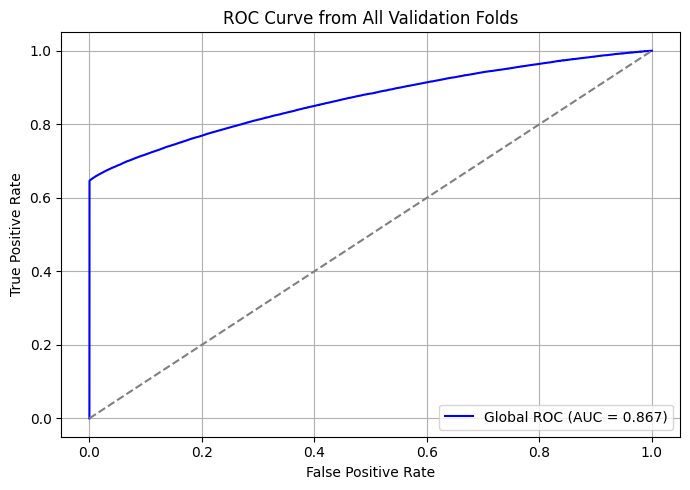

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

def cross_val_roc(final_df, best_params, cat_col_to_encode, interaction_cols,
                  interaction_name_prefix='ps_car_11_cat_enc', n_splits=10):
    xgb_params = {k: best_params[k] for k in best_params if k not in ['smoothing', 'min_samples_leaf', 'noise_level', 'early_stopping_rounds']}
    encoding_params = {
        'smoothing': best_params['smoothing'],
        'min_samples_leaf': best_params['min_samples_leaf'],
        'noise_level': 0.0
    }

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    aucs = []
    roc_data = []
    y_trues = []  # True validation data
    y_preds = []  # Prediction of validation data

    X = final_df.drop(columns=['target']).copy()
    y = final_df['target']

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # target encoding
        X_train[interaction_name_prefix], X_val[interaction_name_prefix] = target_encode(
            X_train[cat_col_to_encode], X_val[cat_col_to_encode], y_train, **encoding_params
        )
        X_train.drop(columns=[cat_col_to_encode], inplace=True)
        X_val.drop(columns=[cat_col_to_encode], inplace=True)

        # Add interaction terms
        for base_col in interaction_cols:
            inter_col_name = f"{base_col}_{interaction_name_prefix}"

            if base_col not in X_train.columns:
                pass
            else:
                X_train[inter_col_name] = X_train[base_col] * X_train[interaction_name_prefix]
                X_val[inter_col_name] = X_val[base_col] * X_val[interaction_name_prefix]

        model = XGBClassifier(eval_metric='auc', use_label_encoder=False, **xgb_params)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred)
        fpr, tpr, _ = roc_curve(y_val, y_pred)

        aucs.append(auc_score)
        roc_data.append((fpr, tpr))
        y_trues.append(y_val)
        y_preds.append(y_pred)

        print(f"Fold {fold+1} AUC: {auc_score:.4f}")

    return aucs, roc_data, y_trues, y_preds

aucs, roc_data, y_trues, y_preds = cross_val_roc(
    final_df=final_train,
    best_params=joint_study.best_params,
    cat_col_to_encode='ps_car_11_cat',
    interaction_cols=['ps_reg_02', 'ps_car_13']
)

# Concatenate validation predictions from all folds
y_true_all = np.concatenate(y_trues)
y_pred_all = np.concatenate(y_preds)

# Compute ROC Curve for entire training data based on all validation predictions
fpr_all, tpr_all, _ = roc_curve(y_true_all, y_pred_all)
auc_all = auc(fpr_all, tpr_all)

# Plot the overall ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr_all, tpr_all, label=f"Global ROC (AUC = {auc_all:.3f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve from All Validation Folds")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### KS Score and probability threshold

In [ ]:
from scipy.stats import ks_2samp
import numpy as np
import pandas as pd

# Separate predicted probabilities by class
y_pred_pos = y_pred_all[y_true_all == 1]
y_pred_neg = y_pred_all[y_true_all == 0]

# Compute KS statistic using the two-sample Kolmogorov-Smirnov test
ks_statistic = ks_2samp(y_pred_pos, y_pred_neg).statistic
print(f"KS Score = {ks_statistic:.4f}")

# Construct a DataFrame and sort by predicted probability (descending)
df_ks = pd.DataFrame({'y_true': y_true_all, 'y_pred': y_pred_all})
df_ks.sort_values(by='y_pred', ascending=False, inplace=True)

# Calculate cumulative distribution for positive and negative classes
df_ks['cum_pos'] = (df_ks['y_true'] == 1).cumsum() / (df_ks['y_true'] == 1).sum()
df_ks['cum_neg'] = (df_ks['y_true'] == 0).cumsum() / (df_ks['y_true'] == 0).sum()
df_ks['ks'] = np.abs(df_ks['cum_pos'] - df_ks['cum_neg'])

# Identify the probability threshold at which KS reaches its maximum
ks_threshold = df_ks.loc[df_ks['ks'].idxmax(), 'y_pred']
print(f"KS Threshold (p) = {ks_threshold:.4f}")


KS Score = 0.6473
KS Threshold (p) = 0.3915


### Recall at KS Threshold

In [ ]:
# Apply threshold to get binary predictions
df_ks['predicted_label'] = (df_ks['y_pred'] >= ks_threshold).astype(int)

# Compute recall = TP / (TP + FN)
true_positives = ((df_ks['predicted_label'] == 1) & (df_ks['y_true'] == 1)).sum()
actual_positives = (df_ks['y_true'] == 1).sum()
recall_at_ks = true_positives / actual_positives

print(f"Recall at KS Threshold = {recall_at_ks:.4f}")


Recall at KS Threshold = 0.6583


### SHAP Feature Importance

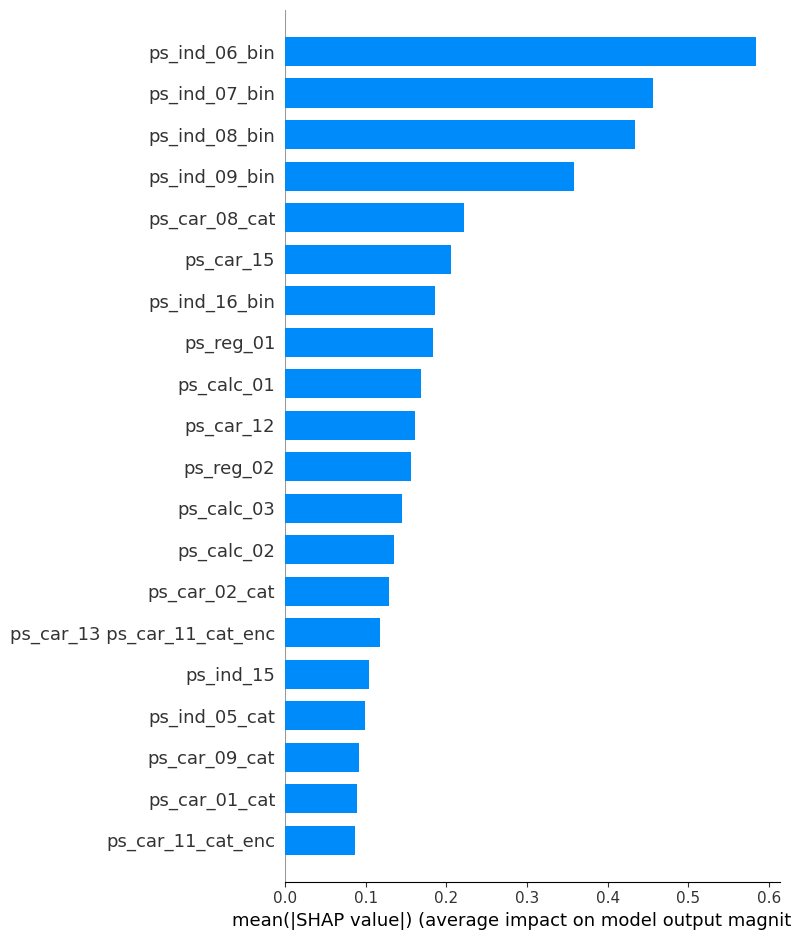

In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

cat_col_to_encode = 'ps_car_11_cat'
interaction_name_prefix = 'ps_car_11_cat_enc'
interaction_cols = ['ps_reg_02', 'ps_car_13']

X = final_train.drop(columns=['target']).copy()
y = final_train['target']

# Apply target encoding
X[interaction_name_prefix], _ = target_encode(
    trn_series=X[cat_col_to_encode],
    val_series=X[cat_col_to_encode],
    target=y,
    min_samples_leaf=joint_study.best_params['min_samples_leaf'],
    smoothing=joint_study.best_params['smoothing'],
    noise_level=0.0
)

X.drop(columns=[cat_col_to_encode], inplace=True)

#Add interaction terms
for col in interaction_cols:
    if col in X.columns:
        X[f'{col}_{interaction_name_prefix}'] = X[col] * X[interaction_name_prefix]

xgb_params = {k: v for k, v in joint_study.best_params.items() if k not in ['smoothing', 'min_samples_leaf', 'noise_level', 'early_stopping_rounds']}

# Fit the whole training dataset model
model = xgb.XGBClassifier(eval_metric='auc', use_label_encoder=False, **xgb_params)
model.fit(X, y)

# SHAP Feature Importance Plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar')

## Prediction for test dataset

In [ ]:
final_test['ps_car_11_cat'] = ps_car_11_cat_test

In [ ]:
def cross_val_predict_test(final_train, final_test, best_params, cat_col_to_encode, interaction_cols,
                           interaction_name_prefix='ps_car_11_cat_enc', n_splits=10,
                           id_col='id', output_path='submission.csv'):
    xgb_params = {k: best_params[k] for k in best_params if k not in ['smoothing', 'min_samples_leaf', 'noise_level', 'early_stopping_rounds']}
    encoding_params = {
        'smoothing': best_params['smoothing'],
        'min_samples_leaf': best_params['min_samples_leaf'],
        'noise_level': 0.0
    }

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_test_pred_total = np.zeros(len(final_test))

    X = final_train.drop(columns=['target']).copy()
    y = final_train['target']
    X_test = final_test.copy()

    for fold, (train_idx, _) in enumerate(kf.split(X, y)):
        X_train = X.iloc[train_idx].copy()
        y_train = y.iloc[train_idx]

        # Target Encoding
        X_train[interaction_name_prefix], X_test_enc = target_encode(
            X_train[cat_col_to_encode], X_test[cat_col_to_encode], y_train, **encoding_params
        )
        X_train.drop(columns=[cat_col_to_encode], inplace=True)
        X_test_enc = X_test.drop(columns=[cat_col_to_encode]).copy()
        X_test_enc[interaction_name_prefix] = X_test[interaction_name_prefix].values

        # Add interaction terms
        for base_col in interaction_cols:
            inter_col = f"{base_col}_{interaction_name_prefix}"

            if base_col not in X_train.columns or base_col not in X_test_enc.columns:
                continue

            X_train[inter_col] = X_train[base_col] * X_train[interaction_name_prefix]
            X_test_enc[inter_col] = X_test_enc[base_col] * X_test_enc[interaction_name_prefix]

        model = XGBClassifier(eval_metric='auc', use_label_encoder=False, **xgb_params)
        model.fit(X_train, y_train)

        y_test_pred = model.predict_proba(X_test_enc)[:, 1]
        y_test_pred_total += y_test_pred

        print(f"Fold {fold+1} prediction done")

    y_test_pred_avg = y_test_pred_total / n_splits

    # Build submission DataFrame
    submission = pd.DataFrame({
        'id': final_test[id_col].values if id_col in final_test.columns else final_test.index,
        'prediction': y_test_pred_avg
    })
    submission.to_csv(output_path, index=False)
    print(f"✅ Submission saved to {output_path}")

    return submission


In [ ]:
submission = cross_val_predict_test(
    final_train=final_train,
    final_test=final_test,
    best_params=joint_study.best_params,
    cat_col_to_encode='ps_car_11_cat',
    interaction_cols=['ps_reg_02', 'ps_car_13']
)


Fold 1 prediction done
Fold 2 prediction done
Fold 3 prediction done
Fold 4 prediction done
Fold 5 prediction done
Fold 6 prediction done
Fold 7 prediction done
Fold 8 prediction done
Fold 9 prediction done
Fold 10 prediction done
✅ Submission saved to submission.csv


In [ ]:
result = pd.read_csv('submission.csv')
result.head()

,id,prediction
0,0,0.091937
1,1,0.123401
2,2,0.143684
3,3,0.067734
4,4,0.117787
